# Assignment 3 CSCN8000 Artificial Intelligence Algorithms and Mathematics


## Part 1: iris dataset to check clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Load the Iris dataset
iris = load_iris()

## get only two features from iris dataset

In [3]:
X = iris.data[:, 2:4] # Selecting petal width and length features

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

making elbow chart to find clusters

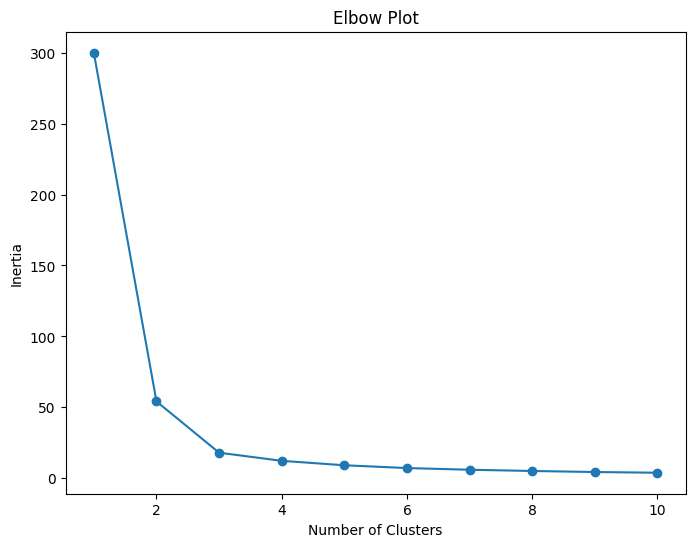

In [6]:
import warnings
warnings.filterwarnings("ignore")
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


## afer the elbow chart the 2 differt clusters will be the best for clustering 

# part 2
* heart dataset to perform the given task

In [7]:
import pandas as pd
import seaborn as sns
heart_data=pd.read_csv('../heart.csv')
heart_data

FileNotFoundError: [Errno 2] No such file or directory: '../heart.csv'

In [ ]:
#find null values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# checking summary
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* boxplots for visulazing the outliers on numeric data

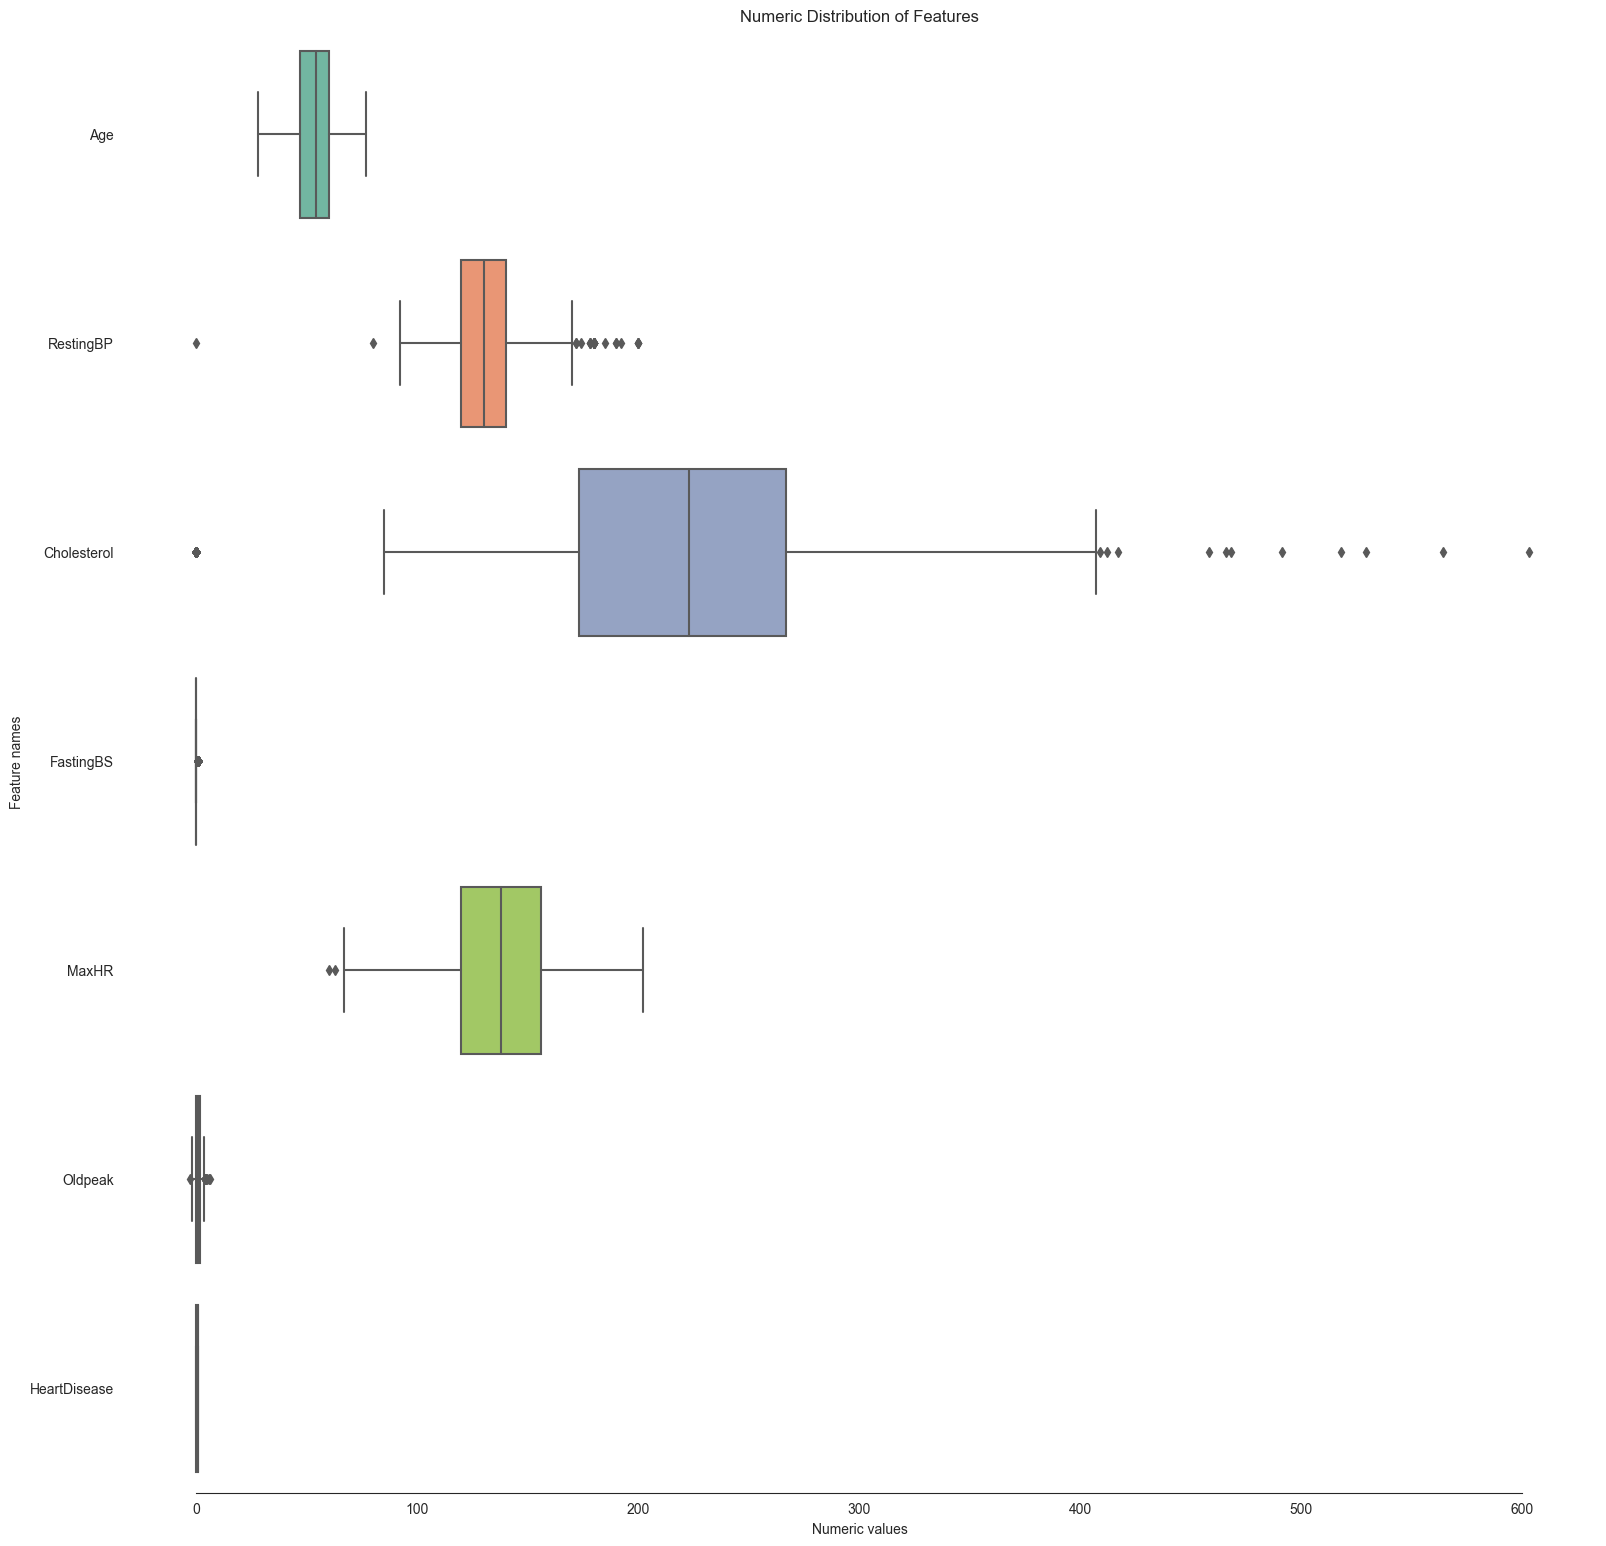

In [ ]:

# Select numeric columns excluding object-type columns
df_exclude_obj = heart_data.select_dtypes(exclude=['object'])

# Set the style
sns.set_style("white")

# Create a violin plot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=df_exclude_obj, orient="h", palette="Set2")

# Set labels and title
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")

# Remove spines and trim
sns.despine(trim=True, left=True)

# Show the plot
plt.show()

In [ ]:
from scipy import stats

# Calculate z-scores for numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
z_scores = stats.zscore(heart_data[numerical_columns])

# Define a threshold for outlier detection (e.g., |z-score| > 3)
threshold = 3

# Find and remove outliers based on the threshold
outliers = heart_data[(abs(z_scores) > threshold).any(axis=1)]
df_no_outliers = heart_data[~heart_data.index.isin(outliers.index)]

print("Original dataset shape:", heart_data.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)


Original dataset shape: (918, 12)
Dataset shape after removing outliers: (899, 12)


outliers removed using the z_score and it has now 899 raws


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb = LabelEncoder()
df_no_outliers['ChestPainType'] = lb.fit_transform(df_no_outliers['ChestPainType'])
df_no_outliers['Sex'] = lb.fit_transform(df_no_outliers['Sex'])
df_no_outliers['RestingECG'] = lb.fit_transform(df_no_outliers['RestingECG'])
df_no_outliers['ExerciseAngina'] = lb.fit_transform(df_no_outliers['ExerciseAngina'])
df_no_outliers['ST_Slope'] = lb.fit_transform(df_no_outliers['ST_Slope'])
df_no_outliers.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()

# Apply scaling to numerical columns
df_scaled = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(df_scaled, columns=df_no_outliers.columns)

print(df_scaled.head())


        Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS   
0 -1.428154  0.515943       0.224572   0.465900     0.849636  -0.550362  \
1 -0.475855 -1.938199       1.270637   1.634714    -0.168122  -0.550362   
2 -1.745588  0.515943       0.224572  -0.118507     0.793612  -0.550362   
3 -0.581666 -1.938199      -0.821492   0.349019     0.149344  -0.550362   
4  0.053200  0.515943       1.270637   1.050307    -0.028064  -0.550362   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0    0.014143  1.384320       -0.822945 -0.855469  1.042496     -1.099475  
1    0.014143  0.752973       -0.822945  0.137516 -0.622165      0.909525  
2    1.603415 -1.535661       -0.822945 -0.855469  1.042496     -1.099475  
3    0.014143 -1.141069        1.215148  0.634008 -0.622165      0.909525  
4    0.014143 -0.588640       -0.822945 -0.855469  1.042496     -1.099475  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_scaled.drop('HeartDisease', axis=1)
y = df_no_outliers['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## making models for 3 different types

In [ ]:
classifier = {
    "SVM": SVC(),
    "LR": LogisticRegression(),
    "random_forest": RandomForestClassifier(),
}

In [ ]:
for name ,model in classifier.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    print(name, accuracy)

SVM 0.8777777777777778
LR 0.8555555555555555
random_forest 0.8888888888888888


the accuracy of the  randpom_forest model is 0.88 which is best among others.</br></br>
the accuracy of the  logistic regression model is 0.85 which is lowest among others.</br></br>
the accuracy of the  svm model is 0.87 which is second best among others.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Split data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=42)

# Build classification models using PCA and evaluate accuracy
for name ,model in classifier.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy=accuracy_score(y_test, y_pred)
    print(name, accuracy)



SVM 0.8833333333333333
LR 0.9
random_forest 0.8888888888888888


here , before the PCA the Accuracy of Logistic Rergression is 0.85 and after PCA the accuracy is 0.9 which is increased by 0.05 and best then others models.</br></br>
 SVM and Random_forest had almost same accuracy, which was better than Logistic Regression before PCA but after PCA the accuracy of Logistic Regression is better than others.</br></br>